In [2]:
import numpy as np
import numpy_financial as npf

In [4]:
# Zadanie 1
def procent_skladany(P, r, n, t):
    return P * (1 + r / n) ** (n * t)

P = 120000  # Początkowa wartość mieszkania
r = 0.05  # Roczna stopa procentowa 5%
n = 12    # Kapitalizacja co miesiąc
t = 5    # Liczba lat

wartosc_mieszkania = procent_skladany(P, r, n, t)
print(wartosc_mieszkania)

154003.04142042142


In [9]:
print("Przyszła wartość mieszkania po 5 latach wynosi: " + str("{:.2f} zł".format(procent_skladany(P, r, n, t))))

Przyszła wartość mieszkania po 5 latach wynosi: 154003.04 zł


In [10]:
# Parametry do zadania 2
future_value = 154003.04  # Docelowa kwota, którą chcemy uzbierać
annual_rate = 0.12    # Roczne oprocentowanie
years = 5             # Liczba lat

monthly_rate = annual_rate / 12  # Miesięczne oprocentowanie
n_periods = years * 12           # Liczba miesięcy

# Obliczenie miesięcznej wpłaty
monthly_payment = npf.pmt(monthly_rate, n_periods, 0, future_value)
print(f"Aby uzbierać {future_value} zł na mieszkanie w {years} lat przy rocznym oprocentowaniu {annual_rate*100}%, należy wpłacać miesięcznie {abs(monthly_payment):.2f} zł.")

Aby uzbierać 154003.04 zł w 5 lat przy rocznym oprocentowaniu 12.0%, należy wpłacać miesięcznie 1885.68 zł.


In [29]:
# Macierz obrazująca narastającą wartość mieszkania
def generate_sequence_m(initial_value, multiplier, length):
    result = np.zeros(length)
    result[0] = initial_value
    for i in range(1, length):
        result[i] = result[i - 1] * multiplier
    return result

initial_value_m = 120500 # wartość już w pierwszym miesiącu podniesiona o odsetki
multiplier_m = 1 + (r/n)
length_m = (n*t)

np.set_printoptions(suppress=True)

mieszkanie_sequence = generate_sequence_m(initial_value_m, multiplier_m, length_m)
print(mieszkanie_sequence)

[120500.         121002.08333333 121506.25868056 122012.53475839
 122520.92031988 123031.42415455 123544.05508853 124058.82198473
 124575.733743   125094.79930026 125616.02763068 126139.42774581
 126665.00869475 127192.77956431 127722.74947916 128254.92760199
 128789.32313367 129325.94531339 129864.80341886 130405.90676644
 130949.2647113  131494.8866476  132042.78200863 132592.960267
 133145.43093478 133700.20356367 134257.28774519 134816.69311079
 135378.42933209 135942.50612097 136508.93322981 137077.7204516
 137648.87762015 138222.41461023 138798.34133778 139376.66776002
 139957.40387568 140540.55972516 141126.14539069 141714.17099648
 142304.64670897 142897.58273692 143492.98933166 144090.87678721
 144691.25544049 145294.13567149 145899.52790345 146507.44260305
 147117.89028056 147730.88149007 148346.42682961 148964.5369414
 149585.22251199 150208.49427245 150834.36299859 151462.83951108
 152093.93467571 152727.65940353 153364.02465104 154003.04142042]


In [30]:
# Macierz obrazująca narastającą wartość lokaty przy stałych wpłatach
def generate_sequence_l(initial_value, multiplier, length):
    result = np.zeros(length)
    result[0] = initial_value
    for i in range(1, length):
        result[i] = (result[i - 1] * multiplier) + initial_value
    return result

initial_value_l = 1885.68
multiplier_l = 1 + monthly_rate
length_l = n_periods

lokata_sequence = generate_sequence_l(initial_value_l, multiplier_l, length_l)
print(lokata_sequence)

[  1885.68         3790.2168       5713.798968     7656.61695768
   9618.86312726  11600.73175853  13602.41907611  15624.12326688
  17666.04449954  19728.38494454  21811.34879399  23915.14228193
  26039.97370474  28186.05344179  30353.59397621  32542.80991597
  34753.91801513  36987.13719528  39242.68856724  41520.79545291
  43821.68340744  46145.58024151  48492.71604393  50863.32320437
  53257.63643641  55675.89280077  58118.33172878  60585.19504607
  63076.72699653  65593.1742665   68134.78600916  70701.81386925
  73294.51200794  75913.13712802  78557.9484993   81229.2079843
  83927.18006414  86652.13186478  89404.33318343  92184.05651526
  94991.57708042  97827.17285122 100691.12457973 103583.71582553
 106505.23298379 109455.96531362 112436.20496676 115446.24701643
 118486.38948659 121556.93338146 124658.18271527 127790.44454242
 130954.02898785 134149.24927773 137376.4217705  140635.86598821
 143927.90464809 147252.86369457 150611.07233152 154002.86305483]


Text(0, 0.5, 'Wartość w zł')

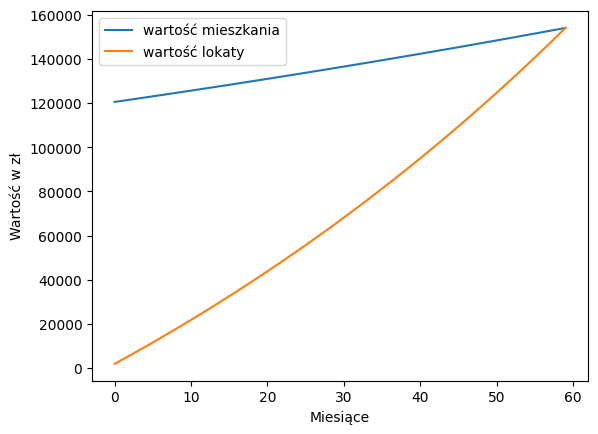

In [31]:
import matplotlib.pyplot as plt

plt.plot(mieszkanie_sequence,label='wartość mieszkania')
plt.plot(lokata_sequence,label='wartość lokaty')
plt.legend()
plt.xlabel('Miesiące')
plt.ylabel('Wartość w zł')